In [132]:
import pandas as pd
import numpy as np

# Split

In [133]:
column_name = ["timestamp","scenario_time","speed","ax","ay","az",
           "road_lateral_shift","lane_lateral_shift","lane",
          "steering","gas","brake","x","y","z","collision","next_path_veh","np_distance","next_lane_veh",
          "nl_distance","nl_speed","event_distance"]
csv_raw = pd.read_csv('./data/2203092.csv', header=None, names=column_name)
# csv_raw.colums = column_name

In [134]:
csv_raw.gas.describe()

count    14021.000000
mean         0.355462
std          0.345980
min          0.000000
25%          0.000000
50%          0.244400
75%          0.668100
max          1.000000
Name: gas, dtype: float64

<AxesSubplot:>

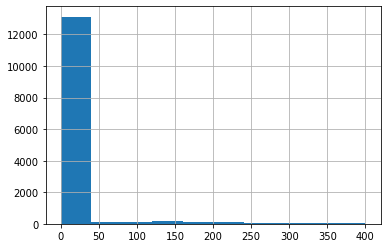

In [135]:
csv_raw["brake"].hist()

In [136]:
csv_raw["steering"].describe()

count    14021.000000
mean         0.000232
std          0.139425
min         -1.661700
25%         -0.030000
50%         -0.000300
75%          0.033000
max          1.549600
Name: steering, dtype: float64

In [137]:
np.pi/2

1.5707963267948966

In [138]:
70/180*np.pi

1.2217304763960306

In [139]:
segment1 = csv_raw.iloc[4442:7562]
segment2 = csv_raw.iloc[7562:9664]
segment3 = csv_raw.iloc[9664:11776]
segment4 = csv_raw.iloc[11777:]

In [140]:
import glob
glob.glob("*.csv")

['lane_change_seg4.csv',
 'lane_change_seg2.csv',
 'lane_change_seg1.csv',
 'lane_change_seg3.csv']

In [146]:
col_names = ["direction","start_t","end_t"]
seg_1_label = pd.read_csv('./lane_change_seg1.csv', header=None, names=col_names)
seg_2_label = pd.read_csv('./lane_change_seg2.csv', header=None, names=col_names)
seg_3_label = pd.read_csv('./lane_change_seg3.csv', header=None, names=col_names)
seg_4_label = pd.read_csv('./lane_change_seg4.csv', header=None, names=col_names)

In [147]:
seg_1_label['end_t'] += 0.5
seg_2_label['end_t'] +=  0.5
seg_3_label['end_t'] +=  0.5
seg_4_label['end_t'] +=  0.5

In [149]:
seg_1_dic = {"left":[],"right":[]}
# segment1.set_index("scenario_time", inplace=True)  
for index, row in seg_1_label.iterrows():
    d = row["direction"]
    s = row["start_t"]
    e = row["end_t"]
    seg_1_dic[d].append(segment1[s:e])

In [150]:
import matplotlib.pyplot as plt

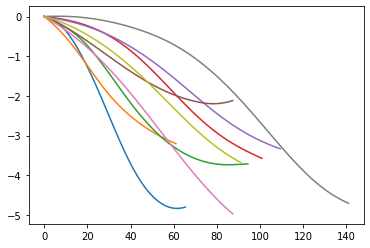

In [151]:
for d in seg_1_dic["right"]: 
    
    plt.plot(d['x'] - d['x'].iloc[0],d.road_lateral_shift - d.road_lateral_shift.iloc[0])
    

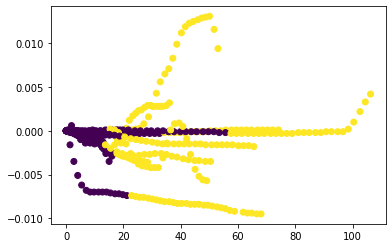

In [40]:
for d in seg_1_dic["left"]: 
    plt.scatter(d['x'] - d['x'].iloc[0],d['y'] - d['y'].iloc[0], c=d["lane"])
   

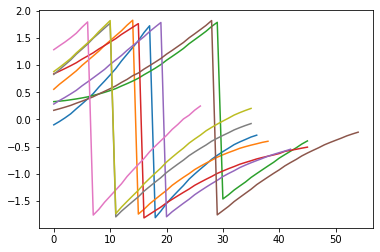

In [57]:
for d in seg_1_dic["left"]: 
    plt.plot(np.arange(len(d["lane_lateral_shift"])), d["lane_lateral_shift"])

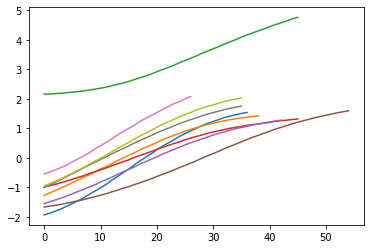

In [58]:
for d in seg_1_dic["left"]: 
    plt.plot(np.arange(len(d["road_lateral_shift"])), d["road_lateral_shift"])

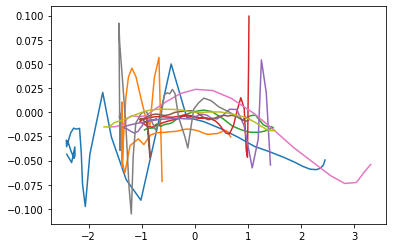

In [56]:
for d in seg_1_dic["left"]: 
    plt.plot(d['ax'] ,d['ay'])

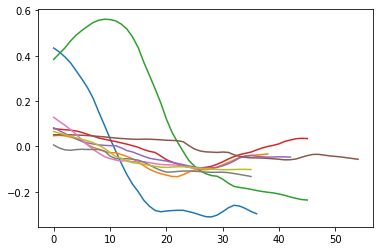

In [45]:
for d in seg_1_dic["left"]: 
    plt.plot(np.arange(len(d['steering'])), d['steering'])
   

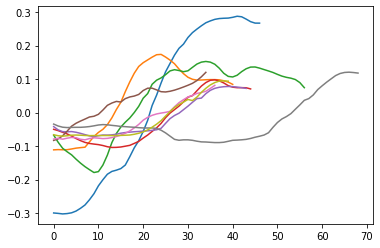

In [46]:
for d in seg_1_dic["right"]: 
    plt.plot(np.arange(len(d['steering'])), d['steering'])
   


In [28]:
for d in seg_1_dic["left"]: 
    plt.plot(np.arange(len(d['steering'])), d['steering'])
   

scenario_time
21.1003    0.4345
21.1503    0.4172
21.1996    0.3951
21.2496    0.3690
21.2995    0.3336
21.3505    0.2978
21.3996    0.2597
21.4498    0.2130
21.4997    0.1519
21.5497    0.0946
21.5999    0.0350
21.6498   -0.0195
21.6997   -0.0740
21.7497   -0.1244
21.7997   -0.1665
21.8498   -0.1993
21.8997   -0.2375
21.9497   -0.2637
21.9996   -0.2823
22.0497   -0.2881
22.0997   -0.2846
22.1496   -0.2826
22.1996   -0.2815
22.2496   -0.2816
22.2998   -0.2876
22.3497   -0.2939
22.3999   -0.3021
22.4500   -0.3096
22.5000   -0.3107
22.5499   -0.3027
22.5998   -0.2876
22.6501   -0.2705
22.7000   -0.2593
22.7500   -0.2630
22.8000   -0.2733
22.8501   -0.2865
22.9000   -0.2967
Name: steering, dtype: float64

### JqD

In [59]:
seg_2_dic = {"left":[],"right":[]}
segment2.set_index("scenario_time", inplace=True)  
for index, row in seg_2_label.iterrows():
    d = row["direction"]
    s = row["start_t"]
    e = row["end_t"]
    seg_2_dic[d].append(segment2[s:e])

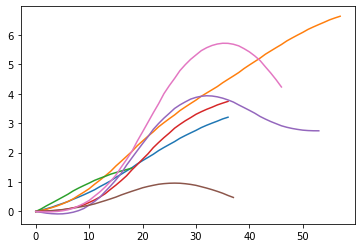

In [63]:
for d in seg_2_dic["left"]: 
    plt.plot(np.arange(len(d["road_lateral_shift"])), d["road_lateral_shift"]-d["road_lateral_shift"].iloc[0])

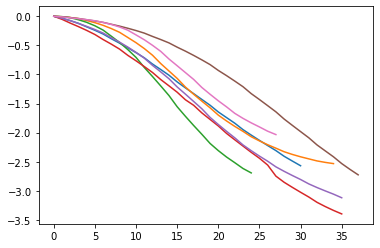

In [64]:
for d in seg_2_dic["right"]: 
    plt.plot(np.arange(len(d["road_lateral_shift"])), d["road_lateral_shift"]-d["road_lateral_shift"].iloc[0])

### Rayne

In [65]:
seg_3_dic = {"left":[],"right":[]}
segment3.set_index("scenario_time", inplace=True)  
for index, row in seg_3_label.iterrows():
    d = row["direction"]
    s = row["start_t"]
    e = row["end_t"]
    seg_3_dic[d].append(segment3[s:e])

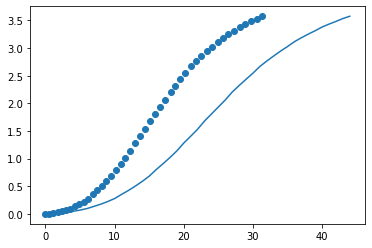

In [80]:
for d in seg_3_dic["left"]: 
    plt.plot(np.arange(len(d["road_lateral_shift"])), d["road_lateral_shift"]-d["road_lateral_shift"].iloc[0])
    plt.scatter(d['x']-d['x'].iloc[0], d["road_lateral_shift"]-d["road_lateral_shift"].iloc[0])
    break

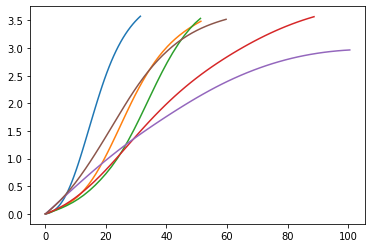

In [78]:
for d in seg_3_dic["left"]: 
    plt.plot(d['x']-d['x'].iloc[0], d["road_lateral_shift"]-d["road_lateral_shift"].iloc[0])

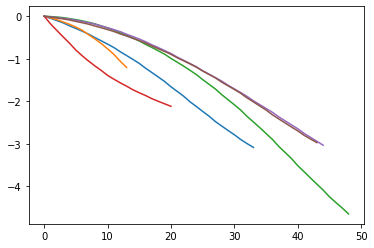

In [67]:
for d in seg_3_dic["right"]: 
    plt.plot(np.arange(len(d["road_lateral_shift"])), d["road_lateral_shift"]-d["road_lateral_shift"].iloc[0])

In [73]:
seg_3_dic['left'][0].speed.describe()

count    45.000000
mean     52.614769
std       5.030028
min      45.183400
25%      48.238000
50%      52.113400
75%      56.620200
max      62.023200
Name: speed, dtype: float64

In [75]:
segment3.speed.describe()

count    2112.000000
mean      128.992345
std        43.421321
min         0.882400
25%       111.572750
50%       141.787450
75%       160.705200
max       191.678200
Name: speed, dtype: float64

### Yujie?

In [68]:
seg_4_dic = {"left":[],"right":[]}
segment4.set_index("scenario_time", inplace=True)  
for index, row in seg_4_label.iterrows():
    d = row["direction"]
    s = row["start_t"]
    e = row["end_t"]
    seg_4_dic[d].append(segment4[s:e])

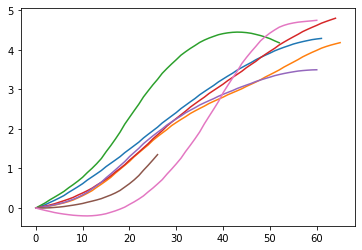

In [69]:
for d in seg_4_dic["left"]: 
    plt.plot(np.arange(len(d["road_lateral_shift"])), d["road_lateral_shift"]-d["road_lateral_shift"].iloc[0])

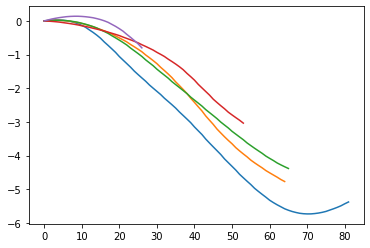

In [70]:
for d in seg_4_dic["right"]: 
    plt.plot(np.arange(len(d["road_lateral_shift"])), d["road_lateral_shift"]-d["road_lateral_shift"].iloc[0])

In [72]:
seg_4_dic['left'][0].speed.describe()

count    62.000000
mean     53.366045
std      10.406177
min      37.092800
25%      43.652750
50%      53.382050
75%      61.224875
max      72.629200
Name: speed, dtype: float64

In [82]:
import pickle
with open('./LHDV.p','rb') as f:
    command_list = pickle.load(f)

In [106]:
command_list

[{'throttle': 0.0,
  'steer': 0.0,
  'brake': 0.0,
  'hand_brake': 0,
  'reverse': False,
  'manual_gear_shift': True,
  'gear': 0},
 {'throttle': 0.0,
  'steer': 0.0,
  'brake': 0.0,
  'hand_brake': 0,
  'reverse': False,
  'manual_gear_shift': True,
  'gear': 0},
 {'throttle': 0.0,
  'steer': 0.0,
  'brake': 0.0,
  'hand_brake': 0,
  'reverse': False,
  'manual_gear_shift': True,
  'gear': 0},
 {'throttle': 0.0,
  'steer': 0.0,
  'brake': 0.0,
  'hand_brake': 0,
  'reverse': False,
  'manual_gear_shift': True,
  'gear': 0},
 {'throttle': 0.0,
  'steer': 0.0,
  'brake': 0.0,
  'hand_brake': 0,
  'reverse': False,
  'manual_gear_shift': True,
  'gear': 0},
 {'throttle': 0.0,
  'steer': 0.0,
  'brake': 0.0,
  'hand_brake': 0,
  'reverse': False,
  'manual_gear_shift': True,
  'gear': 0},
 {'throttle': 0.0,
  'steer': 0.0,
  'brake': 0.0,
  'hand_brake': 0,
  'reverse': False,
  'manual_gear_shift': True,
  'gear': 0},
 {'throttle': 0.0,
  'steer': 0.0,
  'brake': 0.0,
  'hand_brake': 0,

In [112]:
np.interp(np.pi/2, [-np.pi*3, np.pi*3], [-1, 1])

0.16666666666666674

# Clean

In [86]:
segment_dicts = [seg_1_dic, seg_2_dic, seg_3_dic, seg_4_dic]

In [90]:
left_turns = []
right_turns = []

for d in segment_dicts:
    left_turns += d['left']
    right_turns += d['right']

In [91]:
len(left_turns)

29

In [92]:
len(right_turns)

27

<AxesSubplot:xlabel='scenario_time'>

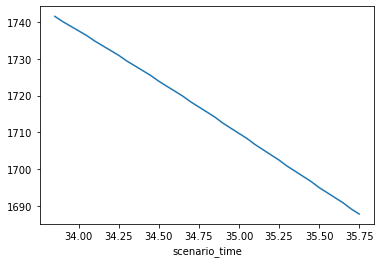

In [119]:
left_turns[1].event_distance.plot()

In [117]:
for i, turn in enumerate(left_turns):
    control_commands = []
    for _, row in turn.iterrows():
        control_dict = {'hand_brake': 0,
                        'reverse': False,
                        'manual_gear_shift': True}
        control_dict["steer"] = np.interp(row["steering"], [-np.pi*3, np.pi*3], [-1, 1])
        control_dict["throttle"] = row["gas"]
#         control_dict["brake"] = row["brake"]
        control_dict["brake"] = 0
        control_commands.append(control_dict)
    with open('./left/LHDV_%d.p'%i,'wb') as f:
        pickle.dump(control_commands, f)

FileNotFoundError: [Errno 2] No such file or directory: './left/LHDV_0.p'

In [ ]:
right_control_commands = []